In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, median_absolute_error
import math
from sklearn.metrics import mean_absolute_error

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Inox = pd.read_csv("E:\INOXLEISUR.NS.csv", index_col='Date', parse_dates=['Date'])
Inox.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-05,289.950012,292.500000,285.549988,287.950012,287.950012,983108
2020-10-06,290.799988,290.799988,281.549988,282.850006,282.850006,445133
2020-10-07,285.450012,285.450012,278.299988,281.450012,281.450012,400273
2020-10-08,285.000000,287.000000,278.649994,281.450012,281.450012,513714
2020-10-09,283.450012,286.500000,281.000000,284.149994,284.149994,674598


In [3]:
Inox.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

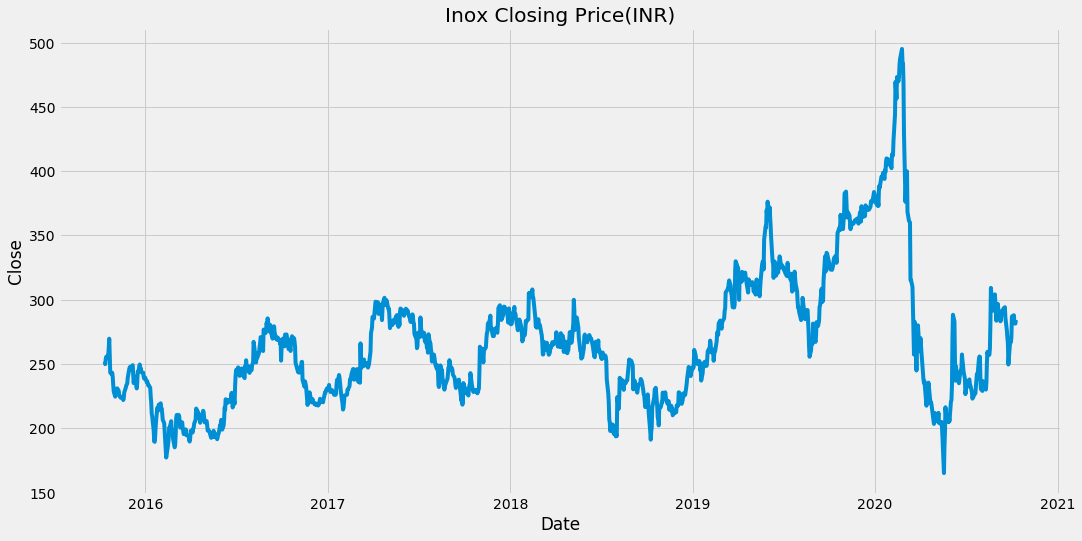

In [4]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(Inox['Close'])
plt.title('Inox Closing Price(INR)')
plt.show()

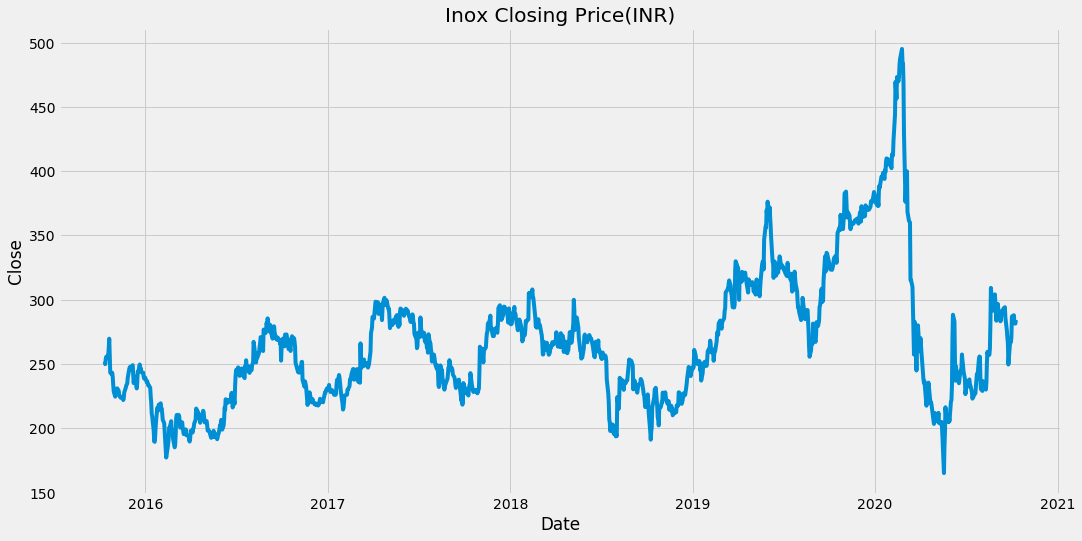

In [5]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(Inox['Close'])
plt.title('Inox Closing Price(INR)')
plt.show()

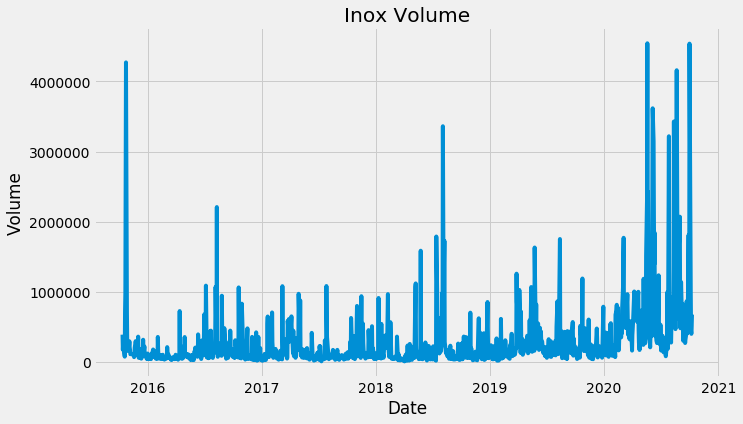

In [6]:
plt.xlabel('Date')
plt.ylabel('Volume')
plt.plot(Inox['Volume'])
plt.title('Inox Volume')
plt.show()

CLOSE PRICE PREDICTION

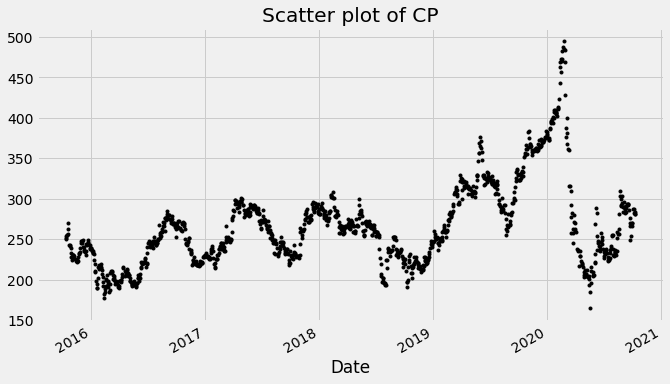

In [7]:
dt_close = Inox['Close']
dt_close.plot(style='k.')
plt.title('Scatter plot of CP')
plt.show()

In [8]:
def test_stationarity(timeseries):
    rolmean  = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print('Results of fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key,values in adft[4].items():
        output['Critical value (%s)'%key] = values
    print(output)

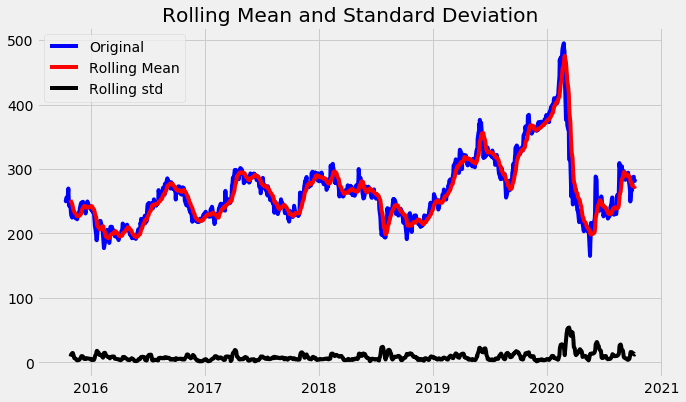

Results of fuller test
Test Statistics                  -2.544998
p-value                           0.104906
No. of lags used                  1.000000
Number of observations used    1228.000000
Critical value (1%)              -3.435686
Critical value (5%)              -2.863896
Critical value (10%)             -2.568025
dtype: float64


<Figure size 720x432 with 0 Axes>

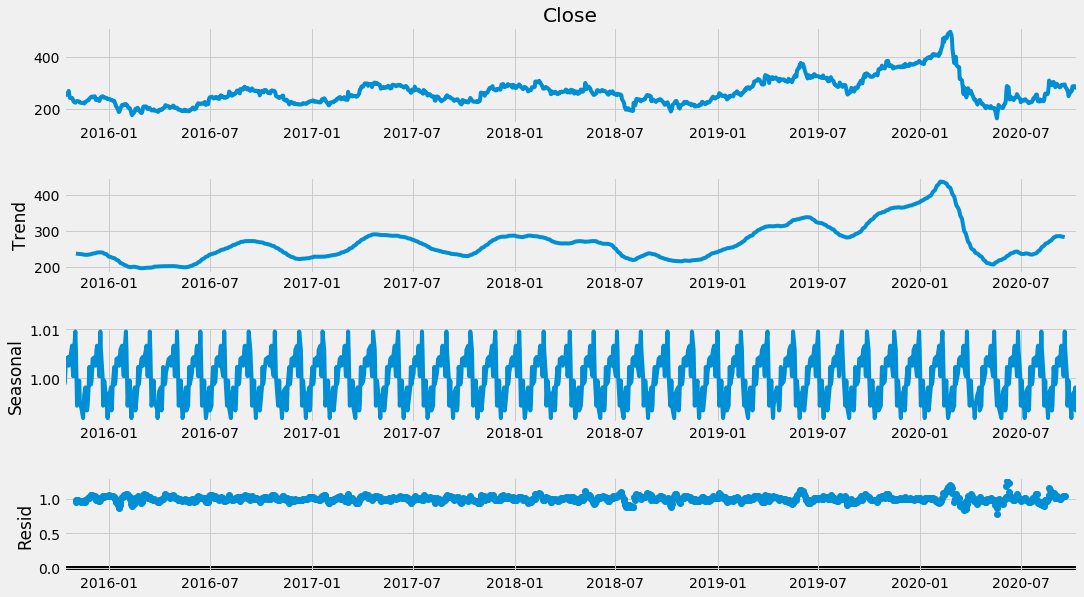

In [9]:
test_stationarity(dt_close)
result = seasonal_decompose(dt_close, model='multiplicative', freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

No handles with labels found to put in legend.


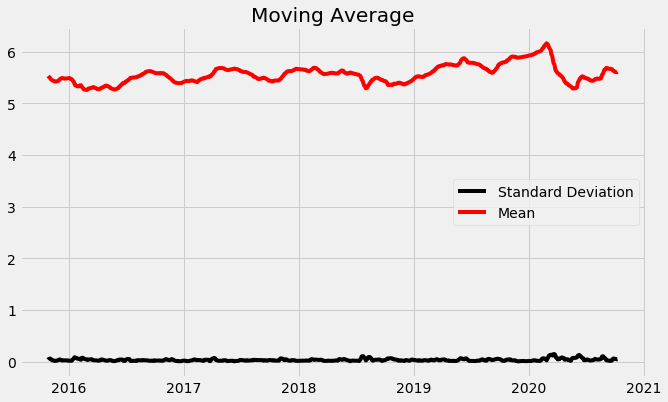

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
dt_log = np.log(dt_close)
moving_avg = dt_log.rolling(12).mean()
std_dev = dt_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color='black', label = "Standard Deviation")
plt.plot(moving_avg, color='red', label = "Mean")
plt.legend()
plt.show()

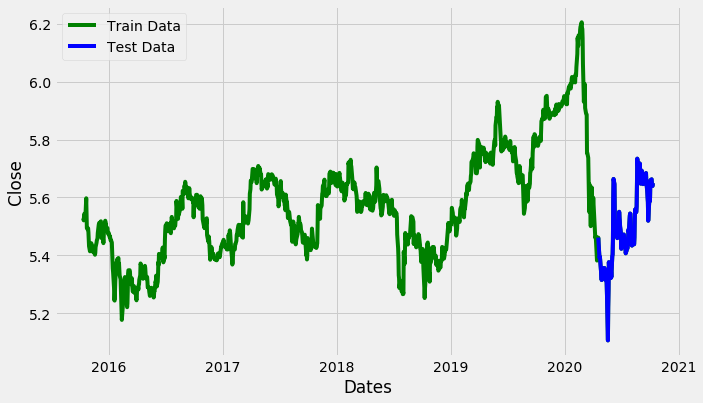

In [11]:
train_data, test_data = dt_log[3:int(len(dt_log)*0.9)], dt_log[int(len(dt_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close')
plt.plot(dt_log, 'green', label='Train Data')
plt.plot(test_data, 'blue', label='Test Data')
plt.legend()
plt.show()

In [12]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                             test='adf',
                             max_p=3, max_q=3,
                             m=1,
                             d=None,
                             seasonal=False,
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-5067.427, BIC=-5057.415, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-5065.708, BIC=-5050.690, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-5065.692, BIC=-5050.675, Fit time=0.049 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-5064.653, BIC=-5044.630, Fit time=0.478 seconds
Total fit time: 0.606 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1103
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2535.713
Method:                           css   S.D. of innovations              0.024
Date:                Tue, 13 Oct 2020   AIC                          -5067.427
Time:                        22:16:20   BIC                          -5057.415
Sample:                             1   HQIC                         -5063.640
                                                                              
              

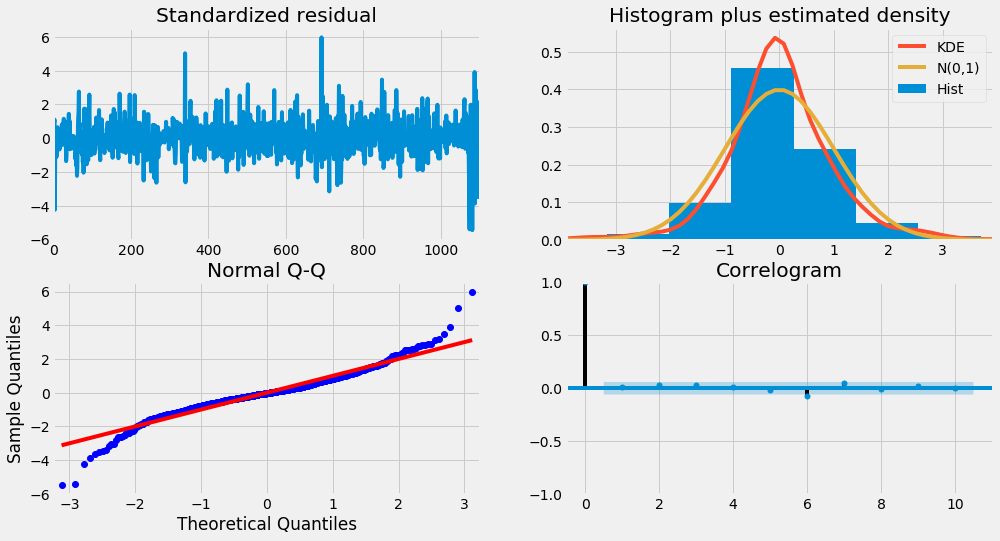

In [13]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [14]:
model = ARIMA(train_data, order=(3,1,2))
fitted = model.fit(disp=-1)
print(fitted.summary())

E:\Punita Trivedi\Ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Punita Trivedi\Ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1103
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2540.803
Method:                       css-mle   S.D. of innovations              0.024
Date:                Tue, 13 Oct 2020   AIC                          -5067.605
Time:                        22:16:23   BIC                          -5032.565
Sample:                             1   HQIC                         -5054.351
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.001     -0.138      0.890      -0.002       0.001
ar.L1.D.Close    -0.0531      0.043     -1.226      0.220      -0.138       0.032
ar.L2.D.Close    -0.9736      0.020    -

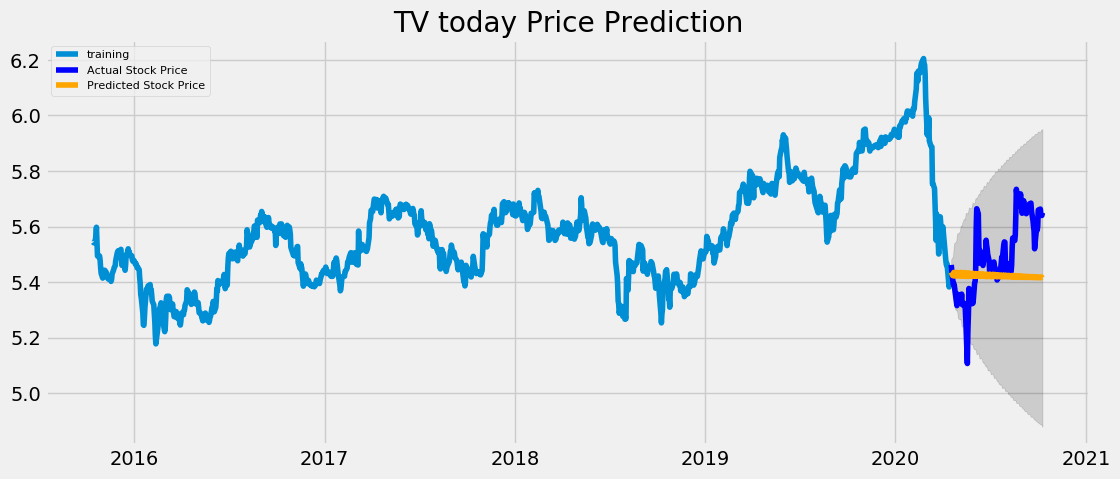

In [15]:
fc, se, conf = fitted.forecast(123, alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('TV today Price Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [17]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual)/actual)
    rmse = np.mean((forecast - actual)**2)**.5
    corr = np.corrcoef(forecast, actual)[0,1]
    mins = np.amin(np.hstack([forecast[:,None],
                             actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                             actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)
    acf1 = acf(fc-test_data)[1]
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'acf1': acf1, 'corr': corr, 'minmax': minmax})
forecast_accuracy(fc, test_data.values)

{'mape': 0.022127798605600733,
 'me': -0.07555112675867334,
 'mae': 0.12295120557657056,
 'mpe': -0.013177669601215851,
 'rmse': 0.1526446236214111,
 'acf1': 0.9500604164911971,
 'corr': -0.586664113348187,
 'minmax': 0.022019481663601903}

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [19]:
df = pd.read_csv("E:\INOXLEISUR.NS.csv", header=0)

model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=8282.662, BIC=8303.117, Fit time=0.159 seconds
Fit ARIMA: order=(0, 1, 0); AIC=8283.193, BIC=8293.421, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=8280.772, BIC=8296.113, Fit time=0.020 seconds
Fit ARIMA: order=(0, 1, 1); AIC=8280.890, BIC=8296.232, Fit time=0.016 seconds
Fit ARIMA: order=(2, 1, 0); AIC=8282.622, BIC=8303.077, Fit time=0.047 seconds
Fit ARIMA: order=(2, 1, 1); AIC=8284.329, BIC=8309.899, Fit time=0.172 seconds
Total fit time: 0.422 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1229
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4137.386
Method:                       css-mle   S.D. of innovations              7.011
Date:                Tue, 13 Oct 2020   AIC                           8280.772
Time:                        22:16:28   BIC                           8296.113
Sample:               

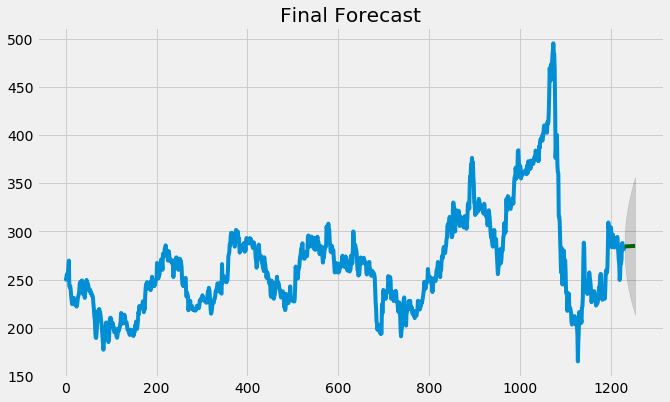

In [20]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Close), len(df.Close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Close)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [21]:
fc_series

1230    284.336649
1231    284.372737
1232    284.399804
1233    284.426331
1234    284.452826
1235    284.479319
1236    284.505811
1237    284.532304
1238    284.558796
1239    284.585289
1240    284.611782
1241    284.638274
1242    284.664767
1243    284.691260
1244    284.717752
1245    284.744245
1246    284.770738
1247    284.797230
1248    284.823723
1249    284.850216
1250    284.876708
1251    284.903201
1252    284.929693
1253    284.956186
dtype: float64

TECHNICAL ANALYSIS

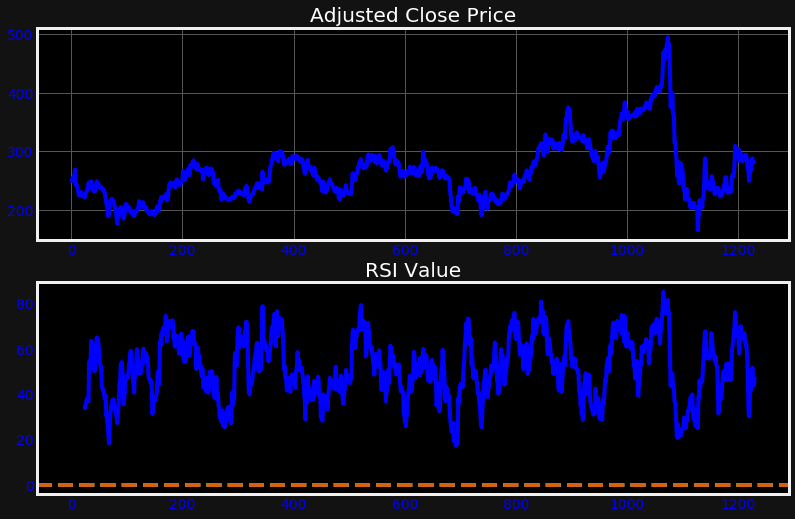

In [22]:
import datetime as dt

data = pd.read_csv("E:\INOXLEISUR.NS.csv")

tv = data["Adj Close"].diff(1)
tv.dropna(inplace=True)

positive = tv.copy()
negative = tv.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 24

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

combined = pd.DataFrame()
combined["Adj Close"] = data["Adj Close"]
combined['RSI'] = RSI

plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined["Adj Close"], color="blue")
ax1.set_title("Adjusted Close Price", color='white')

ax1.grid(True, color="#555555")
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='blue')
ax1.tick_params(axis='y', colors='blue')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='blue')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')

ax2.set_title("RSI Value", color='white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor("black")
ax2.tick_params(axis='x', colors='blue')
ax2.tick_params(axis='y', colors='blue')

plt.show()